In [3]:
import pandas as pd #
import numpy as np
%matplotlib inline


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/leohoare/LogisticRegressionByHand/master/data")

In [5]:
df.head()

,Col1,Col2,Label
0,0.464726,-0.552165,0.0
1,-0.465277,0.155947,0.0
2,-0.367907,0.337509,0.0
3,-1.703355,-0.511965,0.0
4,-0.193367,0.642282,0.0


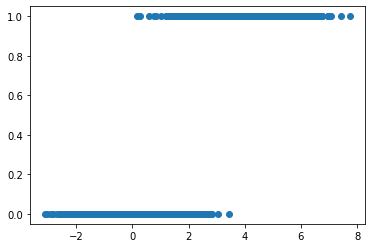

In [9]:
from matplotlib import pyplot as plt
plt.scatter(df["Col2"], df["Label"])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["Col2"], df["Label"], test_size=0.20, random_state=42)

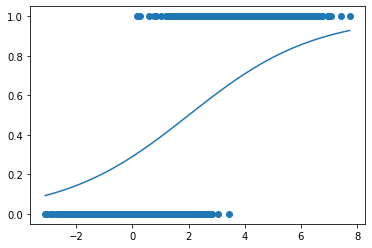

In [41]:
def logistic_function(alpha,beta,x): #defining the logistic function
    return 1/(1 + np.exp(-(alpha+beta*x)))

#estimating alpha and beta
mean = np.mean(X_train)
std = np.std(X_train)
alpha = -mean/std
beta = 1/std

#plotting the logistic function to see how it fits the data
x = np.linspace(min(df["Col2"]),max(df["Col2"]),100)
logistic_REG = logistic_function(alpha,beta,x)
plt.plot(x,logistic_REG)
plt.scatter(df["Col2"], df["Label"])



In [42]:
df_train = pd.DataFrame({"x":X_train,"y":y_train})
df_test = pd.DataFrame({"x":X_test,"y":y_test})
df_train.sort_values(by="x",inplace=True)

In [49]:
#Estimating Worst Case Scenario to compare with our model
worst_mean = np.mean(df_train["x"]*df_train["y"])
#turn boolean into 1 and 0
worst_case = sum((df_train["y"]-(df_train["x"]<worst_mean).astype(int))**2)

In [50]:
y_pred = logistic_function(alpha,beta,X_test)
res = sum((y_test - round(y_pred,0))**2)
1-res/worst_case

0.9946546931793885

Our model parameters:  -0.8955570973814213 0.44599650475340874 
Sklearn model parameters:  [-7.441511] [[3.71027136]]
Our model:  0.9946546931793885 
Sklearn model:  0.9946546931793885


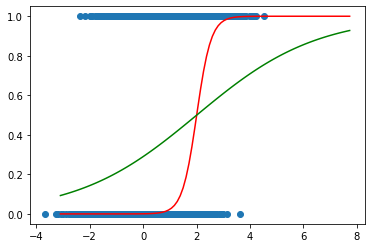

In [51]:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train.values.reshape(-1,1), y_train)
clf.score(X_train.values.reshape(-1,1), y_train)
#show on graph
x = np.linspace(min(df["Col2"]),max(df["Col2"]),100)
logistic_REG_sk = logistic_function(clf.intercept_,clf.coef_,x)

plt.plot(x,logistic_REG_sk.reshape(1,-1)[0],color="red")
plt.scatter(df["Col1"], df["Label"])
plt.plot(x,logistic_REG,color="green")

res_sk= sum((y_test-clf.predict(X_test.values.reshape(-1,1)))**2)

print("Our model parameters: ",alpha,beta,"\nSklearn model parameters: ",clf.intercept_,clf.coef_)
print("Our model: ",1-res/worst_case,"\nSklearn model: ",1-res_sk/worst_case)
